In [1]:
setwd('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1009. NC ENVRIOSCAN/P1009.3. Analyses/P1009.3.4. Sociodemographic & Housing Clustering')
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1009. NC ENVRIOSCAN/P1009.3. Analyses/P1009.3.4. Sociodemographic & Housing Clustering/Output')
cur_date = "022723"

library(readxl)
library(tidyverse)
library(reshape2)
library(factoextra)

# reading in files
acs_whp_df = data.frame(read_excel("Input/Imputed_ACS_WHP_Data_020923.xlsx"))
housing_df = data.frame(read_excel("Input/Imputed_Housing_Data_020923.xlsx"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
# viewing data
head(acs_whp_df)
head(housing_df)

,GEO_ID,Census_Tract,County,Avg_ACRES,Wildfire_Hazard_Potential_Mean,Wildfire_Hazard_Potential_Quintile_Number,Wildfire_Hazard_Potential_Quintile_Percentage,Sex_Ratio,Median_Age,Population_Under_5,⋯,Some_College,College_Education,Employed,Unemployed,Employed_Male,Employed_Female,Full_Time_Work,Part_Time_Work,No_Work,Average_Income_Deficit
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14000US37001020100,201.00,Alamance,278233.8,92.23704,1,81-100,87.2,37.3,9.5,⋯,21.1,0.9,91.61621,8.383791,94.24951,89.20607,43.04307,21.93988,35.01704,5016
2,14000US37001020200,202.00,Alamance,278233.8,92.23704,1,81-100,78.3,31.0,7.1,⋯,18.9,12.4,89.54774,10.452261,86.97436,92.01970,39.42970,23.56604,37.00426,4007
3,14000US37001020300,203.00,Alamance,278233.8,92.23704,1,81-100,77.8,40.7,7.3,⋯,22.6,4.6,93.78094,6.219059,92.69841,94.80990,41.09615,18.98616,39.91770,5370
4,14000US37001020400,204.00,Alamance,278233.8,92.23704,1,81-100,78.1,30.5,8.9,⋯,16.3,5.4,91.69985,8.300153,93.36493,90.64532,37.55153,28.40066,34.04782,7148
5,14000US37001020501,205.01,Alamance,278233.8,92.23704,1,81-100,92.7,35.1,5.5,⋯,3.5,1.5,91.14707,8.852927,96.10136,86.41860,45.86115,25.56742,28.57143,7403
6,14000US37001020502,205.02,Alamance,278233.8,92.23704,1,81-100,99.0,32.1,9.8,⋯,10.8,5.2,89.44282,10.557185,89.64942,89.15094,43.57167,22.82645,33.60188,5412


,GEO_ID,Census_Tract,County,Total_Housing_Units,Housing_Density,Total_Occupied_Housing_Units,Total_Owner_Occupied_Housing_Units,Median_Year_Structure_Built,Owner_Occupied_Housing_Units_Less_than_HPI,Median_House_Value,Median_Gross_Rent,Median_Gross_Rent_Percentage_of_Household_Income
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14000US37001020100,201.00,Alamance,2006,31.54848,1757,851,1949,824,149600,614,27.9
2,14000US37001020200,202.00,Alamance,1943,26.03618,1675,881,1961,881,83400,609,31.5
3,14000US37001020300,203.00,Alamance,3254,71.60011,2930,2015,1971,1980,91500,763,37.7
4,14000US37001020400,204.00,Alamance,2590,53.47674,2327,1510,1974,1487,96900,659,34.3
5,14000US37001020501,205.01,Alamance,1435,122.03583,1280,990,1973,932,137400,584,46.7
6,14000US37001020502,205.02,Alamance,1484,471.34609,1275,666,1980,666,73500,672,35.9


Using k-means clustering to how GEO IDs cluster based on data from 8 EJ Screen indicators and housing data, seprately. This will be done to prioritize regions of concern in NC based on a higher level of social stressors. 
[source](https://www.epa.gov/ejscreen/overview-socioeconomic-indicators-ejscreen)

In [3]:
# selecting variables we're interested in
ejscreen_indicators = c("Population_Over_65", "Race_Non_White", "Hispanic_Latino", "Population_Under_5",
                          "Non_Proficient_English_Speakers", "Poverty_Overall", "Less_than_High_School", "Unemployed")

housing_indicators = c("Housing_Density", "Median_House_Value")

# changing the df from a wide to long format 
longer_acs_whp_df = pivot_longer(acs_whp_df, cols = c(5,8:49), names_to = "Variables", values_to = "Value") %>%
    filter(Variables %in% ejscreen_indicators)
longer_housing_df = housing_df %>%
                                 pivot_longer(cols = c(4:12), names_to = "Variables", values_to = "Value") %>%
    filter(Variables %in% housing_indicators)
                               
head(longer_acs_whp_df)
head(longer_housing_df)

GEO_ID,Census_Tract,County,Avg_ACRES,Wildfire_Hazard_Potential_Quintile_Number,Wildfire_Hazard_Potential_Quintile_Percentage,Variables,Value
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
14000US37001020100,201,Alamance,278233.8,1,81-100,Population_Under_5,9.5
14000US37001020100,201,Alamance,278233.8,1,81-100,Population_Over_65,15.1
14000US37001020100,201,Alamance,278233.8,1,81-100,Race_Non_White,39.0
14000US37001020100,201,Alamance,278233.8,1,81-100,Hispanic_Latino,9.5
14000US37001020100,201,Alamance,278233.8,1,81-100,Non_Proficient_English_Speakers,3.9
14000US37001020100,201,Alamance,278233.8,1,81-100,Poverty_Overall,27.2


GEO_ID,Census_Tract,County,Variables,Value
<chr>,<dbl>,<chr>,<chr>,<dbl>
14000US37001020100,201,Alamance,Housing_Density,31.54848
14000US37001020100,201,Alamance,Median_House_Value,149600.00000
14000US37001020200,202,Alamance,Housing_Density,26.03618
14000US37001020200,202,Alamance,Median_House_Value,83400.00000
14000US37001020300,203,Alamance,Housing_Density,71.60011
14000US37001020300,203,Alamance,Median_House_Value,91500.00000


In [4]:
# wide formatted df w/ ej screen or housing variables and corresponding geo ids
id_ejscreen_df = reshape2::dcast(longer_acs_whp_df, GEO_ID ~ Variables, value.var = "Value") %>% 
    column_to_rownames("GEO_ID") %>%
    # standardizing data
    scale()

id_housing_df = reshape2::dcast(longer_housing_df, GEO_ID ~ Variables, value.var = "Value") %>% 
    column_to_rownames("GEO_ID") %>%
    # standardizing data
    scale()

head(id_ejscreen_df)
head(id_housing_df)

,Hispanic_Latino,Less_than_High_School,Non_Proficient_English_Speakers,Population_Over_65,Population_Under_5,Poverty_Overall,Race_Non_White,Unemployed
14000US37001020100,0.0483714,0.83345087,-0.09907552,-0.2084962,1.45508797,1.0752117,0.3312172,0.52774783
14000US37001020200,2.2751452,0.36768608,2.25024415,-0.7231416,0.52501516,1.6413079,0.7130681,0.98278576
14000US37001020300,4.1248992,0.63794466,2.89096770,0.2929533,0.60252123,0.7449890,1.0058205,0.05153347
14000US37001020400,1.4032867,0.75294832,1.10470812,-0.8682981,1.22256977,1.5092188,2.0919742,0.50934846
14000US37001020501,0.6374650,-1.15611231,1.06587639,-0.1425160,-0.09503337,-0.2079395,-0.3136866,0.63095195
14000US37001020502,1.6978335,0.02267513,1.70659993,-1.0266505,1.57134707,0.8110335,1.1925031,1.00586764


,Housing_Density,Median_House_Value
14000US37001020100,-0.5811927,-0.1954521
14000US37001020200,-0.5864335,-0.8159194
14000US37001020300,-0.5431144,-0.7400012
14000US37001020400,-0.5603448,-0.6893891
14000US37001020501,-0.4951635,-0.3097980
14000US37001020502,-0.1630631,-0.9087083


Warning message:
“did not converge in 10 iterations”


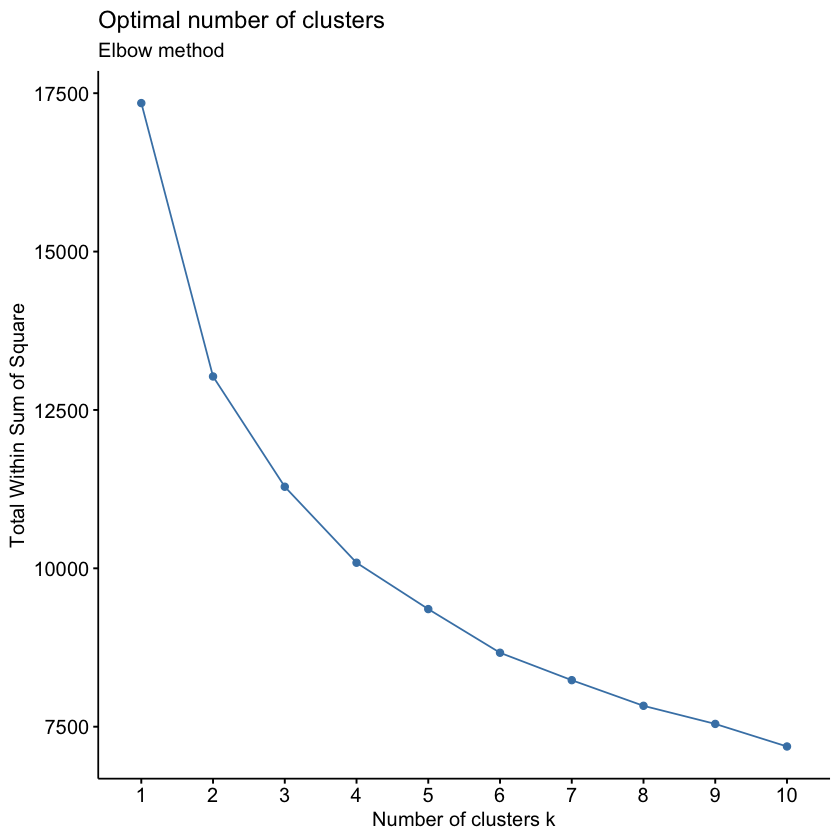

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”


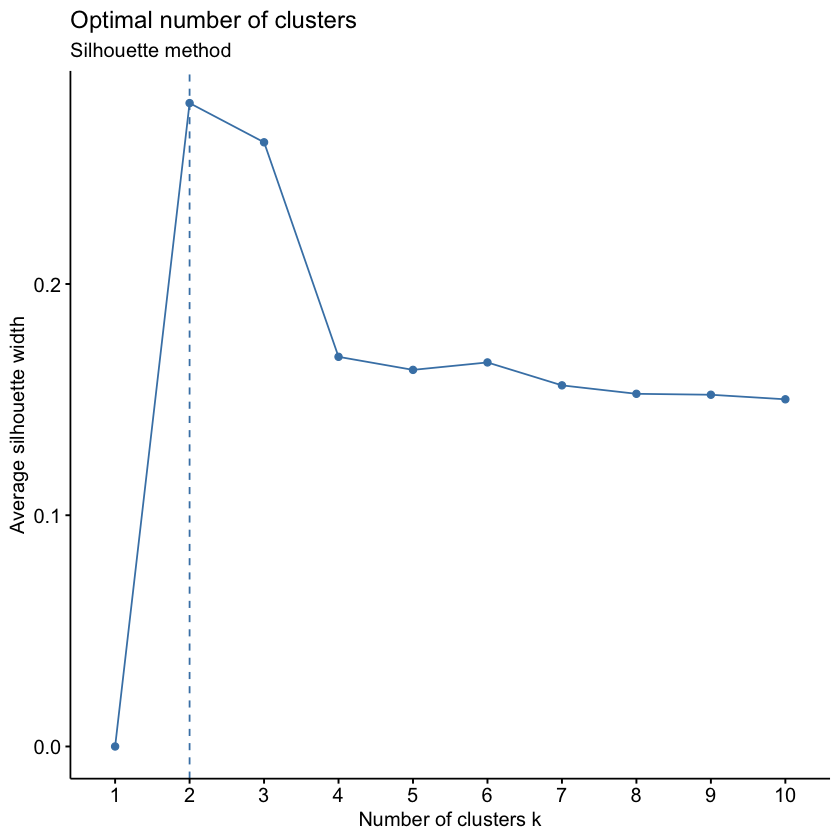

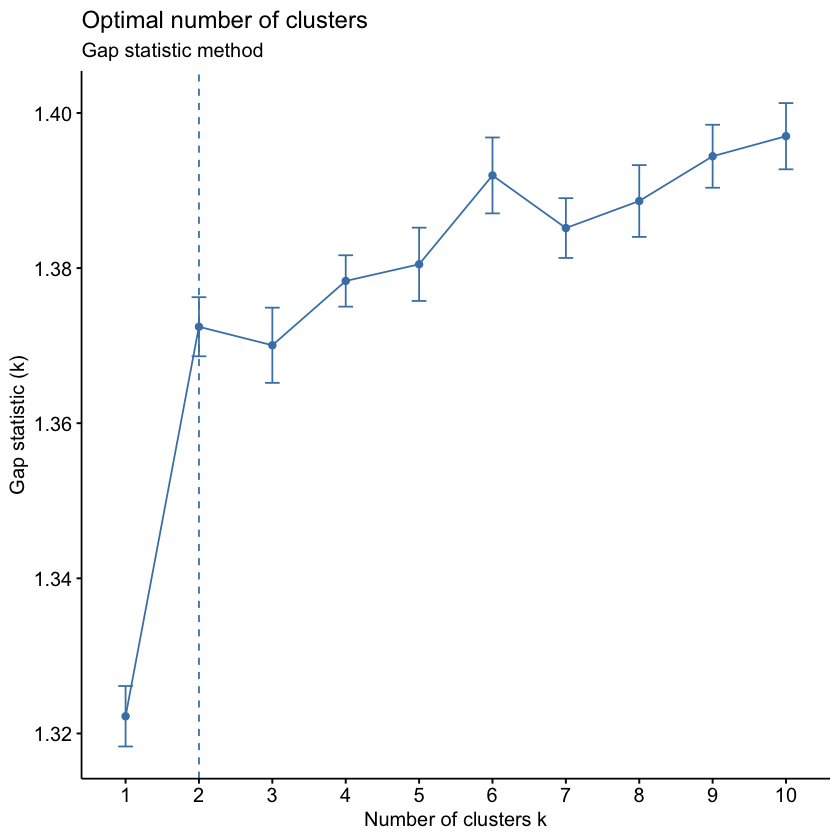

In [5]:
# determining optimal number of clusters using 3 different methods: wss, silhoutte, and gapstat
# ej screen
fviz_nbclust(id_ejscreen_df, kmeans, method = "wss") +
  labs(subtitle = "Elbow method") # suggests ??
fviz_nbclust(id_ejscreen_df, kmeans, method = "silhouette") + 
  labs(subtitle = "Silhouette method") # suggests 2
fviz_nbclust(id_ejscreen_df, kmeans, method = "gap_stat", nboot = 50)+
  labs(subtitle = "Gap statistic method") # suggests 2

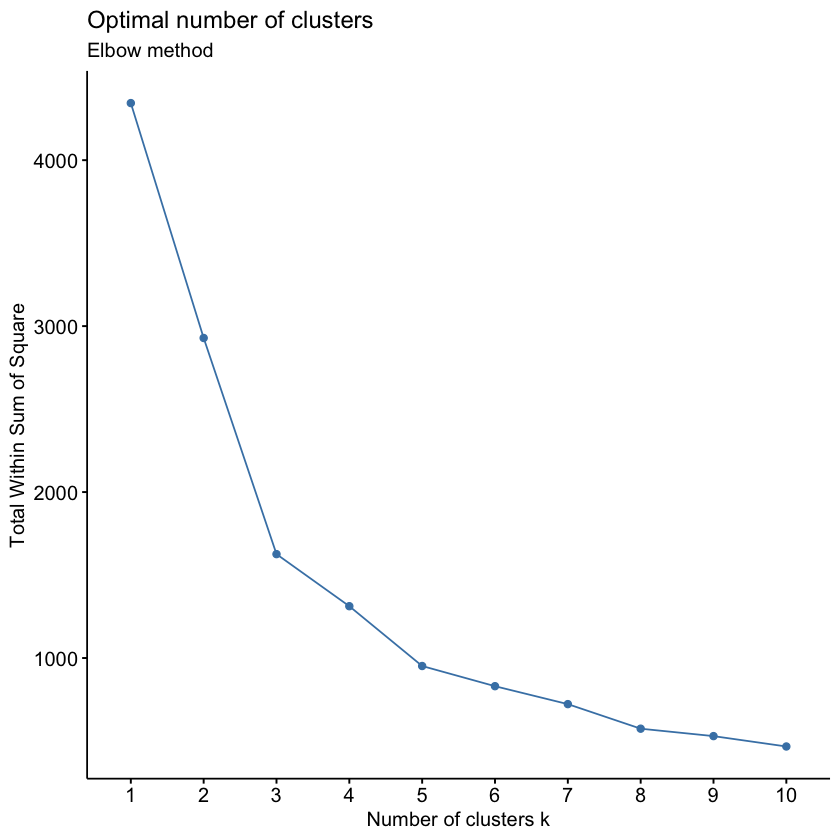

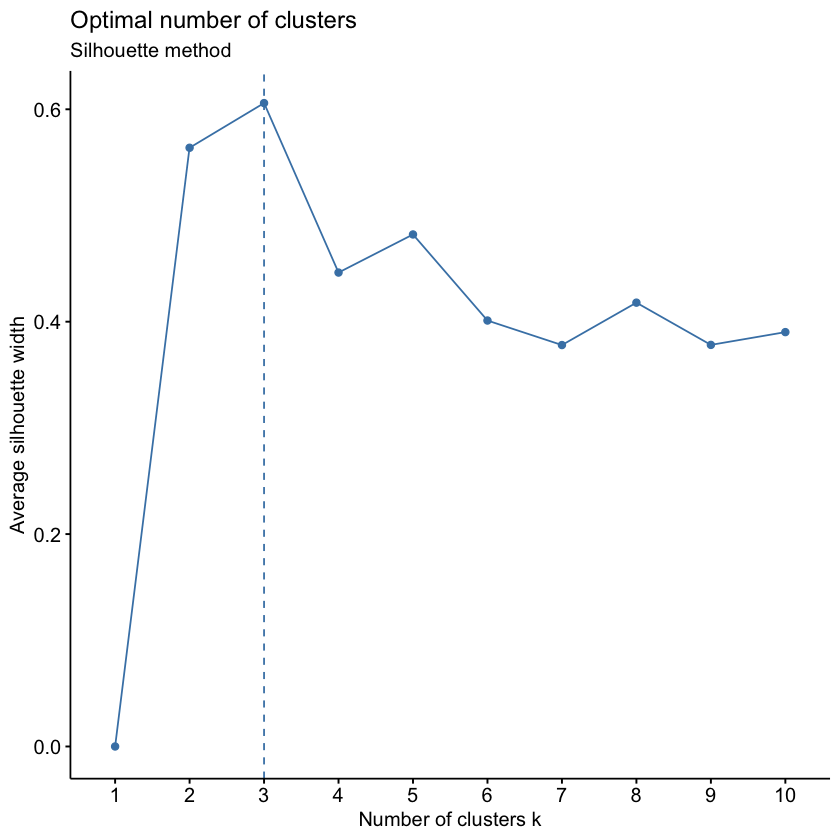

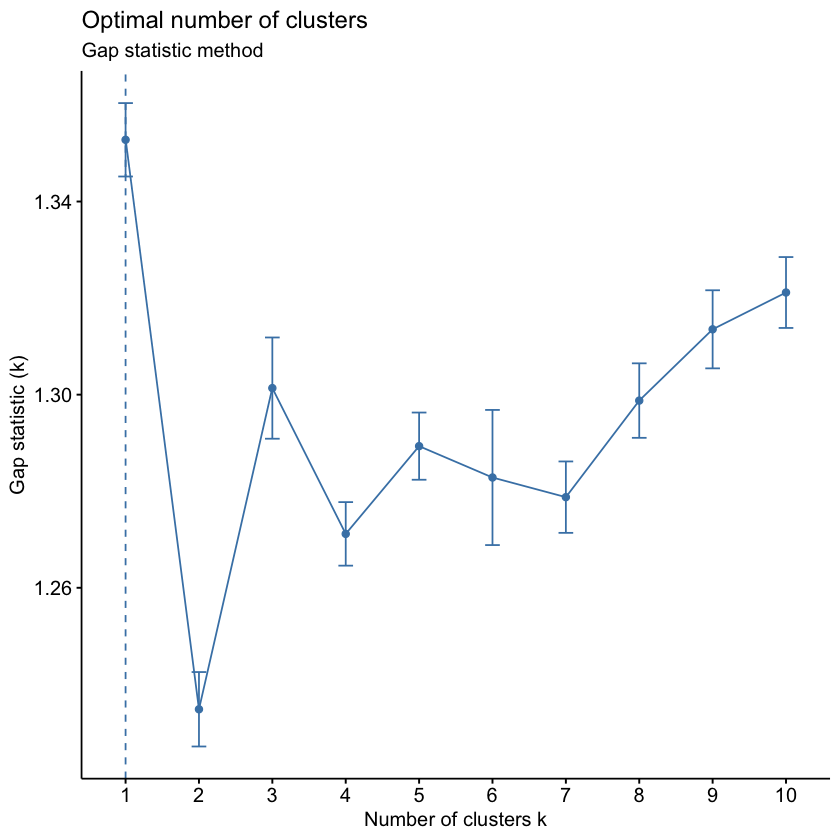

In [6]:
# housing
fviz_nbclust(id_housing_df, kmeans, method = "wss") +
  labs(subtitle = "Elbow method") # suggests ??
fviz_nbclust(id_housing_df, kmeans, method = "silhouette") + 
  labs(subtitle = "Silhouette method") # suggests 4
fviz_nbclust(id_housing_df, kmeans, method = "gap_stat", nboot = 50)+
  labs(subtitle = "Gap statistic method") # suggests 1

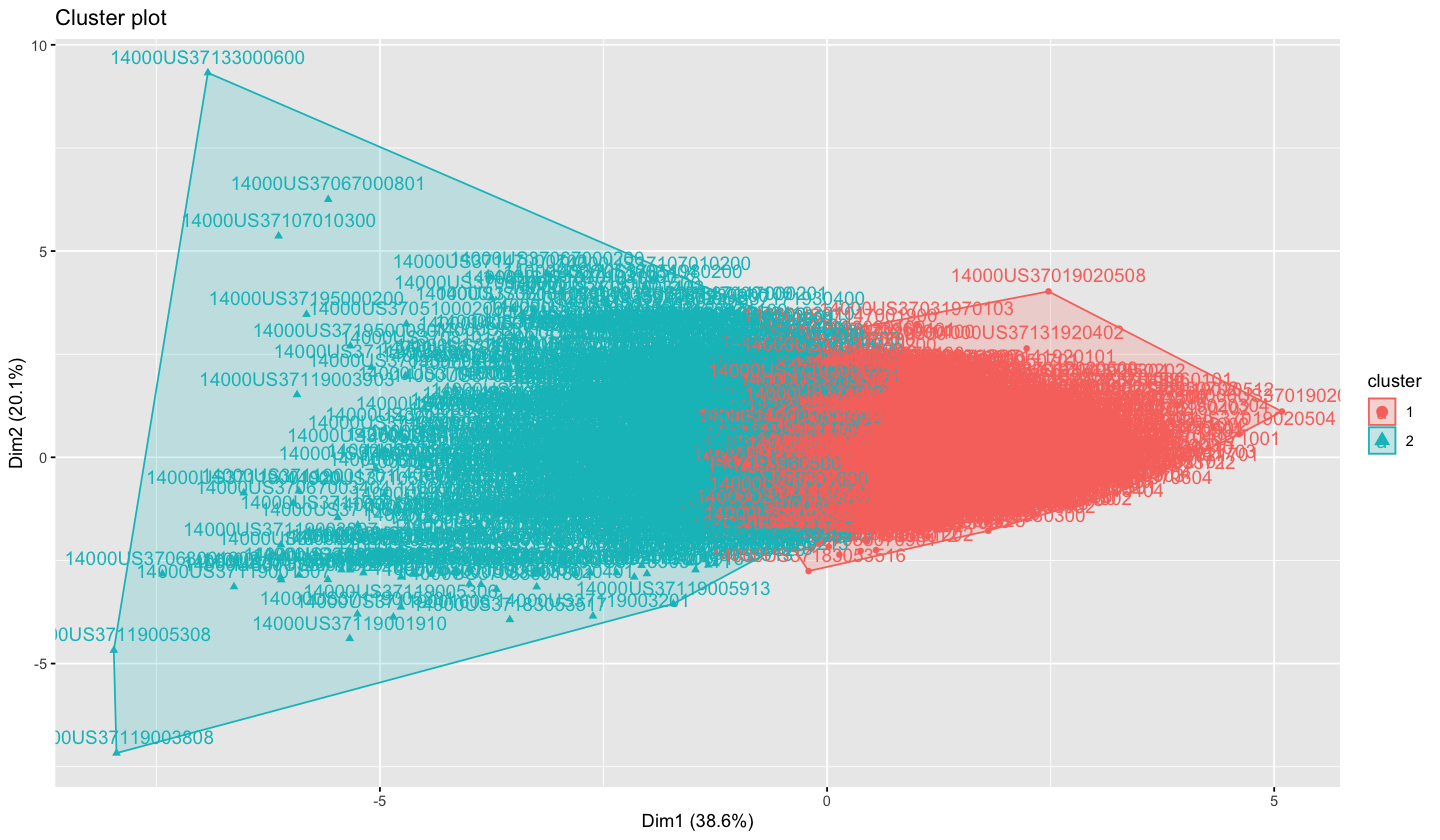

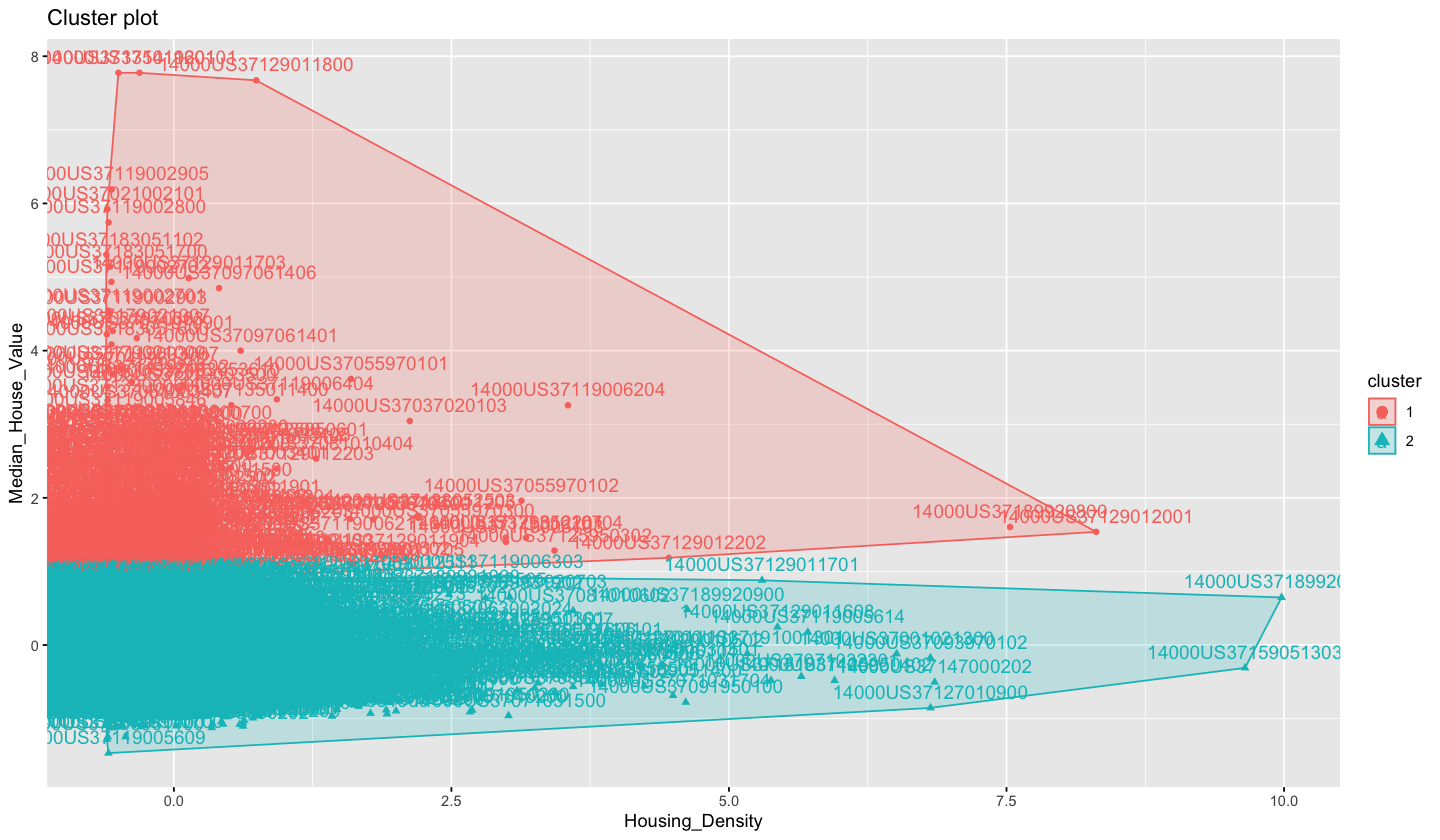

In [7]:
# ended up moving forward with 2 clusters to make mapping of high priority areas more distinct
# ejscreen
options(repr.plot.width=12, repr.plot.height=7) #changing size
ejscreen_kmeans_2 = kmeans(id_ejscreen_df, centers = 2, nstart = 25)
fviz_cluster(ejscreen_kmeans_2, data = id_ejscreen_df) 

# housing
options(repr.plot.width=12, repr.plot.height=7) #changing size
housing_kmeans_2 = kmeans(id_housing_df, centers = 2, nstart = 25)
fviz_cluster(housing_kmeans_2, data = id_housing_df) 

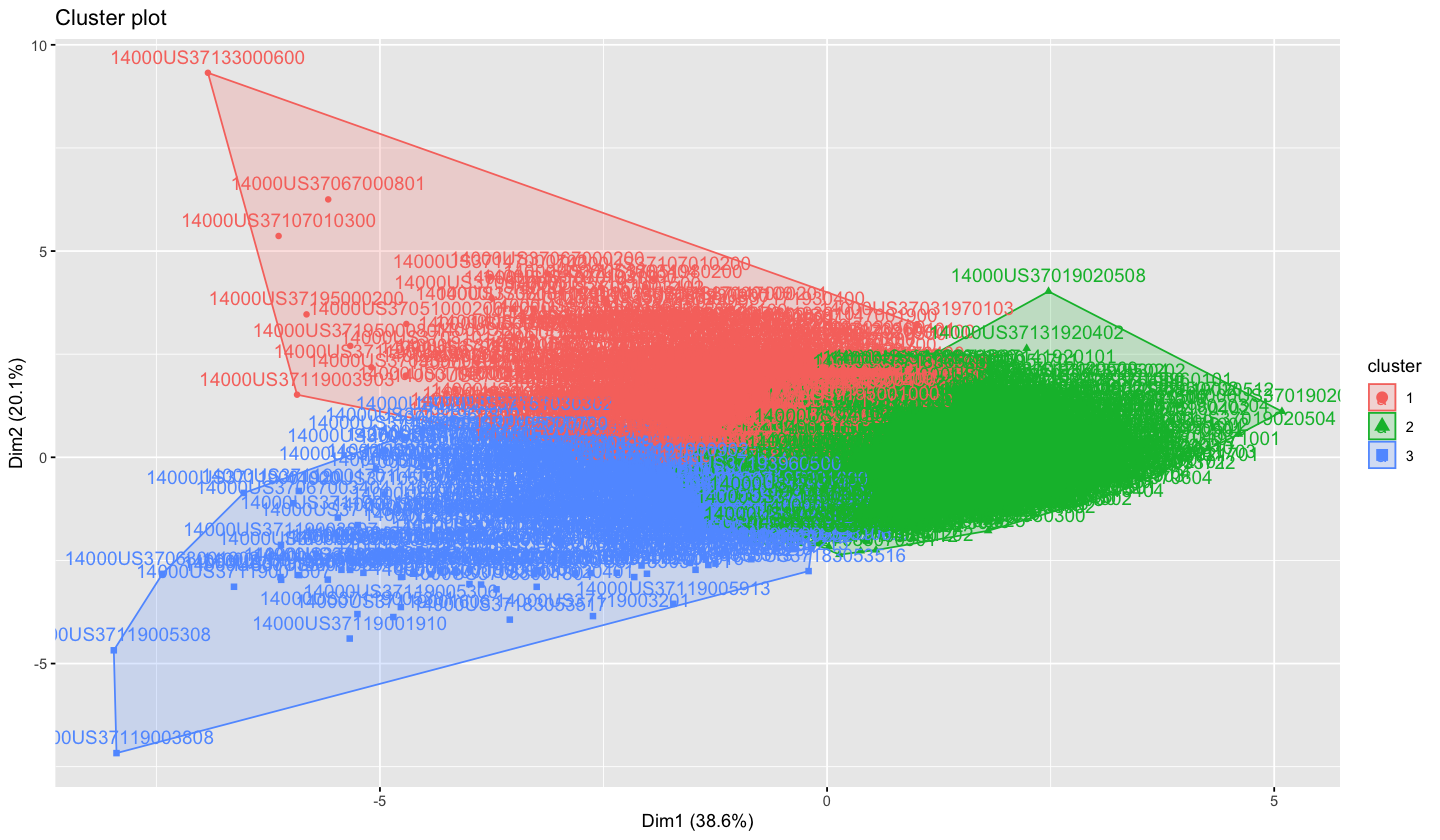

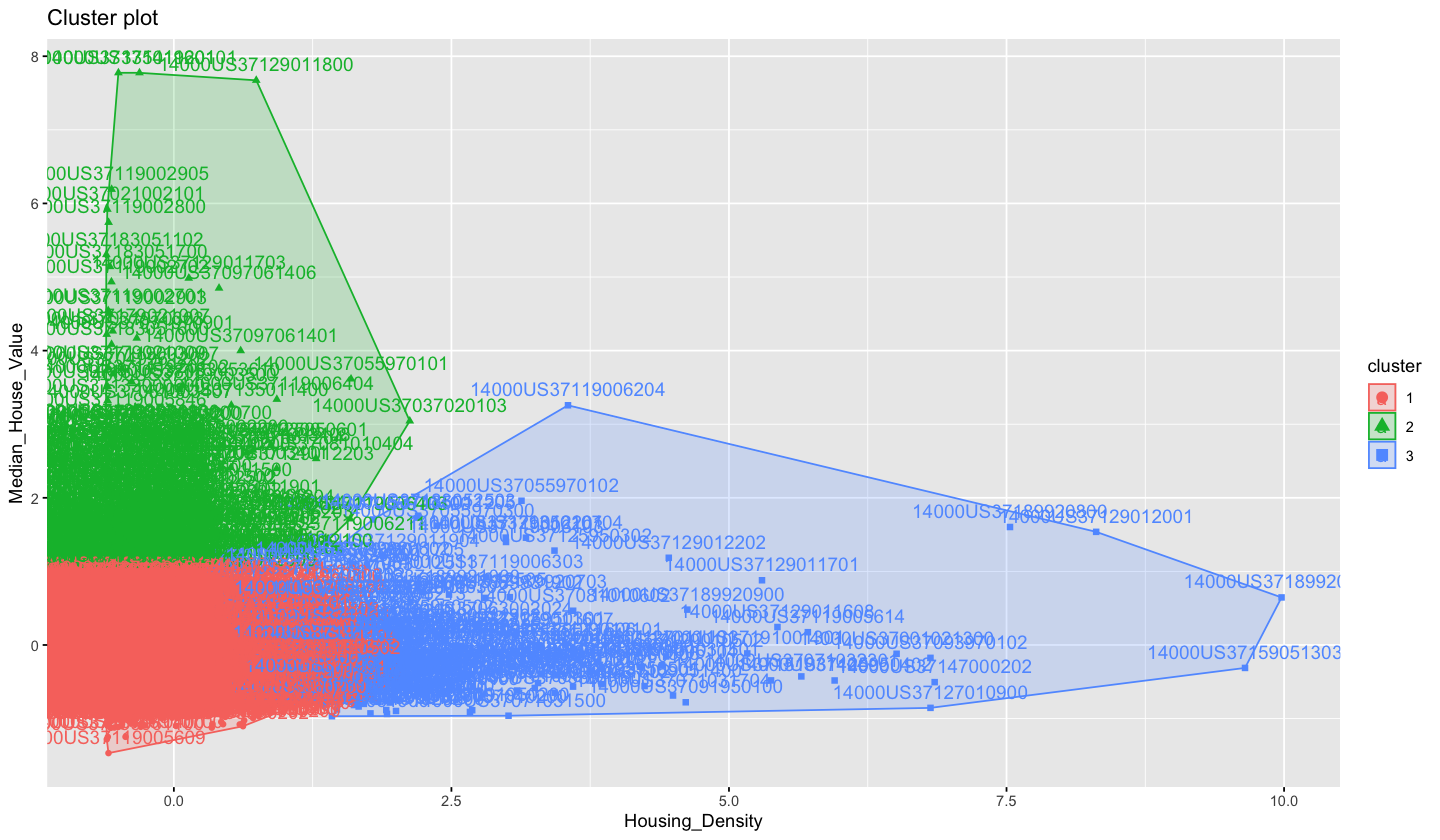

In [8]:
# ended up moving forward with 3 clusters to make mapping of high priority areas more distinct
# ejscreen
options(repr.plot.width=12, repr.plot.height=7) #changing size
ejscreen_kmeans_3 = kmeans(id_ejscreen_df, centers = 3, nstart = 25)
fviz_cluster(ejscreen_kmeans_3, data = id_ejscreen_df) 

# housing
options(repr.plot.width=12, repr.plot.height=7) #changing size
housing_kmeans_3 = kmeans(id_housing_df, centers = 3, nstart = 25)
fviz_cluster(housing_kmeans_3, data = id_housing_df) 

PCA was only able to capture ~60% of data from the EJ screen indicators, however we're still able to see 3 or 4 distinct clusters. Dimensionality reduction (PCA) wasn't needed for the housing indicators, since we're only working with two variables. However, 3 or 4 clusters look nice. 

In [9]:
# extracting geo id cluster assignments
ejscreen_cluster_df = cbind(data.frame(ejscreen_kmeans_2$cluster), data.frame(ejscreen_kmeans_3$cluster)) %>%
    rownames_to_column(var = "GEO_ID")
colnames(ejscreen_cluster_df)[2:3] = c("Cluster_2", "Cluster_3")

housing_cluster_df = cbind(data.frame(housing_kmeans_2$cluster), data.frame(housing_kmeans_3$cluster)) %>%
    rownames_to_column(var = "GEO_ID")
colnames(housing_cluster_df)[2:3] = c("Cluster_2", "Cluster_3")

head(ejscreen_cluster_df)
head(housing_cluster_df)

,GEO_ID,Cluster_2,Cluster_3
,<chr>,<int>,<int>
1,14000US37001020100,2,1
2,14000US37001020200,2,3
3,14000US37001020300,2,3
4,14000US37001020400,2,3
5,14000US37001020501,1,2
6,14000US37001020502,2,3


,GEO_ID,Cluster_2,Cluster_3
,<chr>,<int>,<int>
1,14000US37001020100,2,1
2,14000US37001020200,2,1
3,14000US37001020300,2,1
4,14000US37001020400,2,1
5,14000US37001020501,2,1
6,14000US37001020502,2,1


In [10]:
# exporting scaled data
write.csv(id_ejscreen_df, paste0(Output,"/", cur_date, "_Scaled_EJScreen_Cluster_Variables.csv"), row.names = TRUE)
write.csv(id_housing_df, paste0(Output,"/", cur_date, "_Scaled_Housing_Cluster_Variables.csv"), row.names = TRUE)

# exporting cluster assignments
write.csv(ejscreen_cluster_df, paste0(Output,"/", cur_date, "_GEO_ID_Sociodemographic_Clusters.csv"), row.names = FALSE)
write.csv(housing_cluster_df, paste0(Output,"/", cur_date, "_GEO_ID_Housing_Clusters.csv"), row.names = FALSE)